# Imports

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import json, pickle

import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import load_model
from utils.recommendation import *
from dataset.dataset_padchest import *

In [3]:
@tf.function()
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], config['model']['latent_dim']), mean=0., stddev=0.1)
    return z_mean + tf.math.exp(z_log_sigma) * epsilon

# Data load

In [4]:
with open('', 'r') as f:
    config = json.load(f)

In [5]:
data = Dataset(config)

with open(config["PATHS"]["IMAGES_PATH"] + "", 'rb') as f:
    data = pickle.load(f)

In [6]:
LABELS = sorted(config["padchest"]["label_names"], key=config["padchest"]["label_names"].get)

# Stratify results

## Precision@k

In [7]:
BASE_PATH = ''
model_name = BASE_PATH + 'results_padchest_v33_MOCVAE/models/'

In [8]:
encoder = load_model(model_name + 'e_best_encoder.h5', custom_objects={'sampling': sampling})

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/layers/core.py:1043: UserWarning: models.model_MOCVAE is not loaded, but a Lambda layer uses it. It may cause errors.
  warnings.warn('{} is not loaded, but a Lambda layer uses it. '


In [46]:
acc_mean_dict = dict()
acc_stddev_dict = dict()

for sex in range(1,3):
    if sex==1:
        sex_str = 'Sex: F'
    elif sex==2:
        sex_str = 'Sex: M'
    
    print('\n')
    print(sex_str)
        
    acc_mean_dict[sex_str] = []
    acc_stddev_dict[sex_str] = []
    
    for k in [3,4,5,10]:
        if model_name[-14:-8] == 'MOCVAE':
            res_class = get_recom_results_stratify(data, encoder, n_imgs=500, n_neighbors=k, vae=True,
                                                   sex=sex)
        else:
            res_class = get_recom_results_stratify(data, encoder, n_imgs=500, n_neighbors=k,
                                                   sex=sex)

        acc_mean, acc_stddev = get_recom_acc(res_class)
        #rec_mean, rec_stddev = get_recom_rec(res_class)

        print("Model accuracy with k=", k , " neighbors: ", acc_mean, " +-", acc_stddev)
        #print("Model recall with k=", k , " neighbors: ", rec_mean, " +-", rec_stddev)
    
        acc_mean_dict[sex_str].append(acc_mean)
        acc_stddev_dict[sex_str].append(acc_stddev)

for age in range(1,3):
    if age==1:
        age_str = 'Age>=65'
    elif age==2:
        age_str = 'Age<65'
    
    print('\n')
    print(age_str)
        
    acc_mean_dict[age_str] = []
    acc_stddev_dict[age_str] = []

    for k in [3,4,5,10]:
        if model_name[-14:-8] == 'MOCVAE':
            res_class = get_recom_results_stratify(data, encoder, n_imgs=500, n_neighbors=k, vae=True,
                                                   age=age)
        else:
            res_class = get_recom_results_stratify(data, encoder, n_imgs=500, n_neighbors=k,
                                                   age=age)

        acc_mean, acc_stddev = get_recom_acc(res_class)
        #rec_mean, rec_stddev = get_recom_rec(res_class)

        print("Model accuracy with k=", k , " neighbors: ", acc_mean, " +-", acc_stddev)
            #print("Model recall with k=", k , " neighbors: ", rec_mean, " +-", rec_stddev)

        acc_mean_dict[age_str].append(acc_mean)
        acc_stddev_dict[age_str].append(acc_stddev)

df_acc_mean = pd.DataFrame.from_dict(acc_mean_dict, orient='index', columns=[3, 4, 5, 10])
df_acc_stddev = pd.DataFrame.from_dict(acc_stddev_dict, orient='index', columns=[3, 4, 5, 10])



-Sex: F-
Model accuracy with k= 3  neighbors:  47.51054852320673  +- 32.458860056738715
Model accuracy with k= 4  neighbors:  46.70886075949367  +- 29.530997187779874
Model accuracy with k= 5  neighbors:  46.53164556962025  +- 27.316631667292565
Model accuracy with k= 10  neighbors:  44.68354430379747  +- 22.379660919704495


-Sex: M-
Model accuracy with k= 3  neighbors:  46.689895470383306  +- 33.56019551932477
Model accuracy with k= 4  neighbors:  46.254355400696866  +- 29.386789327073988
Model accuracy with k= 5  neighbors:  46.829268292682926  +- 26.622580480687198
Model accuracy with k= 10  neighbors:  43.937282229965156  +- 21.692407114279305


-Age>=65-
Model accuracy with k= 3  neighbors:  48.30917874396135  +- 32.86444705641536
Model accuracy with k= 4  neighbors:  46.79951690821256  +- 29.029568463503733
Model accuracy with k= 5  neighbors:  47.00483091787439  +- 27.10179372364575
Model accuracy with k= 10  neighbors:  44.371980676328505  +- 22.088246102479133


-Age<65-
Mo

<AxesSubplot:>

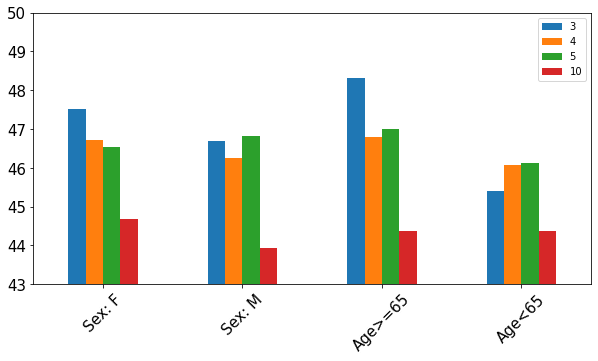

In [53]:
df_acc_mean.plot.bar(figsize=(10, 5), rot=45, fontsize=15, ylim=[43,50])

In [48]:
df_acc_mean

,3,4,5,10
Sex: F,47.510549,46.708861,46.531646,44.683544
Sex: M,46.689895,46.254355,46.829268,43.937282
Age>=65,48.309179,46.799517,47.004831,44.371981
Age<65,45.398010,46.082090,46.119403,44.365672


In [49]:
df_acc_stddev

,3,4,5,10
Sex: F,32.458860,29.530997,27.316632,22.379661
Sex: M,33.560196,29.386789,26.622580,21.692407
Age>=65,32.864447,29.029568,27.101794,22.088246
Age<65,32.951280,30.135651,26.902545,22.108296


## Wass distance

In [7]:
BASE_PATH = ''
model_name = BASE_PATH + 'results_padchest_v33_MOCVAE/models/'

In [8]:
encoder = load_model(model_name + 'e_best_encoder.h5', custom_objects={'sampling': sampling})

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/layers/core.py:1043: UserWarning: models.model_MOCVAE is not loaded, but a Lambda layer uses it. It may cause errors.
  warnings.warn('{} is not loaded, but a Lambda layer uses it. '


In [12]:
acc_mean_dict = dict()
acc_stddev_dict = dict()

for sex in range(1,3):
    if sex==1:
        sex_str = 'Sex: F'
    elif sex==2:
        sex_str = 'Sex: M'
    
    print('\n')
    print(sex_str)
        
    acc_mean_dict[sex_str] = []
    acc_stddev_dict[sex_str] = []
    
    for k in [3,4,5,10]:
        if model_name[-14:-8] == 'MOCVAE':
            res_class = get_distance_results_stratify(data, encoder, n_imgs=500, n_neighbors=k, vae=True,
                                                      sex=sex)
        else:
            res_class = get_distance_results_stratify(data, encoder, n_imgs=500, n_neighbors=k,
                                                      sex=sex)

        acc_mean, acc_stddev = get_dist_acc(res_class)
        
        print("Model wasserstein distance k=", k , " neighbors: ", acc_mean, " +-", acc_stddev)
    
        acc_mean_dict[sex_str].append(acc_mean)
        acc_stddev_dict[sex_str].append(acc_stddev)

for age in range(1,3):
    if age==1:
        age_str = 'Age>=65'
    elif age==2:
        age_str = 'Age<65'
    
    print('\n')
    print(age_str)
        
    acc_mean_dict[age_str] = []
    acc_stddev_dict[age_str] = []

    for k in [3,4,5,10]:
        if model_name[-14:-8] == 'MOCVAE':
            res_class = get_distance_results_stratify(data, encoder, n_imgs=500, n_neighbors=k, vae=True,
                                                      age=age)
        else:
            res_class = get_distance_results_stratify(data, encoder, n_imgs=500, n_neighbors=k,
                                                      age=age)

        acc_mean, acc_stddev = get_dist_acc(res_class)

        print("Model wasserstein distance k=", k , " neighbors: ", acc_mean, " +-", acc_stddev)

        acc_mean_dict[age_str].append(acc_mean)
        acc_stddev_dict[age_str].append(acc_stddev)

df_acc_mean = pd.DataFrame.from_dict(acc_mean_dict, orient='index', columns=[3, 4, 5, 10])
df_acc_stddev = pd.DataFrame.from_dict(acc_stddev_dict, orient='index', columns=[3, 4, 5, 10])



Sex: F
Model wasserstein distance k= 3  neighbors:  0.41983390990497516  +- 0.1644277733343847
Model wasserstein distance k= 4  neighbors:  0.43060881653232863  +- 0.16881338297284912
Model wasserstein distance k= 5  neighbors:  0.43868529829851344  +- 0.16992228184414251
Model wasserstein distance k= 10  neighbors:  0.46594186706642  +- 0.17954531217634012


Sex: M
Model wasserstein distance k= 3  neighbors:  0.4274583801127027  +- 0.14156439384153446
Model wasserstein distance k= 4  neighbors:  0.4380309105808996  +- 0.140131829927222
Model wasserstein distance k= 5  neighbors:  0.4437374223551442  +- 0.1388724807230789
Model wasserstein distance k= 10  neighbors:  0.4713405031739668  +- 0.13819412209694945


Age>=65
Model wasserstein distance k= 3  neighbors:  0.4191664288897423  +- 0.15983179370159598
Model wasserstein distance k= 4  neighbors:  0.43058404045818977  +- 0.16119932471090648
Model wasserstein distance k= 5  neighbors:  0.4390898314717724  +- 0.16054049186662017
Mode

<AxesSubplot:>

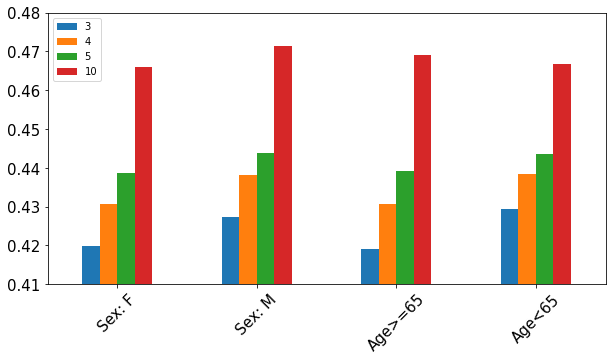

In [18]:
df_acc_mean.plot.bar(figsize=(10, 5), rot=45, fontsize=15, ylim=[0.41,0.48])

In [14]:
df_acc_mean

,3,4,5,10
Sex: F,0.419834,0.430609,0.438685,0.465942
Sex: M,0.427458,0.438031,0.443737,0.471341
Age>=65,0.419166,0.430584,0.439090,0.469149
Age<65,0.429274,0.438471,0.443459,0.466867


In [15]:
df_acc_stddev

,3,4,5,10
Sex: F,0.164428,0.168813,0.169922,0.179545
Sex: M,0.141564,0.140132,0.138872,0.138194
Age>=65,0.159832,0.161199,0.160540,0.167209
Age<65,0.147934,0.151356,0.153140,0.157726
